# Dataset choice

1. Select (create) a dataset1,2, 3 to perform this and other laboratory works. Your choice must be approved by the tutor.

## Requirements
Data set requirements:
- Numeric (integer and real) and categorical values must exist.
- For a dataset, the number of records (rows) m must be at least 500, i.e., ∞> m ≥ 500 and the number of attributes n must be at least 8 (columns) ∞> n ≥ 8. If there are fewer attributes in the selected dataset, you have to add derivatives (created)

## About dataset

The dataset chosen is a set of customers information in IT. The aim of this dataset is to predict customer churn.

Link : [IT Customers Churn (Kaggle.com)](https://www.kaggle.com/datasets/soheiltehranipour/it-customer-churn)


## Attributes

The dataset has 3 different groups of information :
- Services that customer has signed up for
- Customer account information
- Customer demographic information

It also has a column saying if the customer has left the company within the last month.

| Attribute | Type | Description |
| --------- | ---- | ----------- |
| gender | Category | Gender of the customer (male or female) |
| SeniorCitizen | Category | Senior citizen or not (1 or 0) |
| Partner | Category | Customer has a partner or not (Yes or No) |
| Dependents| Category | Customer has dependents or not (Yes or No) |
| tenure | Number (int) | Average time since customer has initiated contracts (in years) |
| PhoneService | Category | Customer has a phone service or not (Yes or No) |
| MultipleLines | Category | Customer has multiples lines |
| InternetService | Category | Type of customer's Internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Category | Customer has online security |
| OnlineBackup | Category | Customer has online backup |
| DeviceProtection | Category | Customer has device protection |
| TechSupport | Category | Customer has tech support |
| StreamingTV | Category | Customer subscribed to Streaming TV |
| StreamingMovies | Category | Customer subscrite to Streaming Movies |
| Contract | Category | Customer contract type (One year, Month-to-month, two year, ...) |
| PaperlessBilling | Category | Customer billing paperless or not (Yes or No) |
| PaymentMethod | Category | Customer payment method |
| MonthlyCharges | Number (float) | Customer monthly charges |
| TotalCharges | Number (float) | Customer total charges |
| Churn | Category | Customer left within the last month (Yes or No) |

# Dataset importation

## Import libraries
Let's import libraries :
- numpy for math 
- pandas for data manipulation and analysis
- matplotlib for plotting

In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load dataset

Loading dataset using the pandas library [read_csv doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv).

In [137]:
# Load dataset
dataset = pd.read_csv("IT_customer_churn.csv")

# Check if the csv file has been well loaded by showing a sample of data
dataset.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5269,Male,0,No,No,10,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,59.65,638.95,No
6138,Male,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),83.85,5588.8,No
4297,Female,0,No,No,45,Yes,Yes,DSL,Yes,No,No,Yes,No,Yes,Two year,No,Mailed check,73.55,3349.1,No
2825,Male,0,No,No,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,26.35,378.6,No
450,Female,0,No,No,64,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,24.70,1642.75,No


## Check datatypes

In [138]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**SeniorCitizen should be an object**

In [139]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(object)

In [140]:
dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges is an object but it should be a float. Let's check that.**

In [141]:
dataset.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The data is string, we need to convert it to float. It also has some spaces in the data...

In [142]:
pd.to_numeric(dataset.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [143]:
dataframe1 = dataset[dataset.TotalCharges != ' ']
dataframe1.shape


(7032, 20)

10 row have been removed. Let's convert to float.

In [144]:
ds = pd.to_numeric(dataframe1.TotalCharges)
#dataframe1.TotalCharges = pd.to_numeric(dataframe1.TotalCharges)
dataset.TotalCharges = ds
dataset.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Check if the type has been changed:

In [145]:
dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Dataset quality analysis

### 2. For each countinuous (numeric) type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality,
- minimum (min) and maximum (max) values,
- 1st and 3rd quartiles,
- average,
- median,
- Standard deviation.

### 3. For each category type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality
- Mode. Mode is the most frequent sample value.
- The frequency value of the mode
- Percentage value of the mode
- Second mode value (2nd mode),
- Frequency value for 2nd mode,
- Percentage of 2nd mode.

Previously, a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) was created. Let's use its methods to find statistics we need.

In [146]:
# create empty lists to store the results
results_categories = []
results_numericals = []

for column in dataset.columns:
    # check if the column is a category
    if dataset[column].dtype == 'object':
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        
        value_counts = dataset[column].value_counts()
        result['Mode'] = value_counts.index[0]
        result['Frequency of Mode'] = value_counts.iloc[0]
        result['Percentage of Mode'] = (value_counts.iloc[0] / dataset[column].count()) * 100
        # Check if 2nd Mode exists
        if value_counts.shape[0] > 1:
            result['2nd Mode'] = value_counts.index[1]
            result['Frequency of 2nd Mode'] = value_counts.iloc[1]
            result['Percentage of 2nd Mode'] = (value_counts.iloc[1] / dataset[column].count()) * 100
            
        results_categories.append(result)

    # check if the column is numeric
    else:
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        result['Min'] = dataset[column].min()
        result['Max'] = dataset[column].max()
        result['1st Quartile'] = dataset[column].quantile(0.25)
        result['3rd Quartile'] = dataset[column].quantile(0.75)
        result['Average'] = dataset[column].mean()
        result['Median'] = dataset[column].median()
        result['Standard Deviation'] = dataset[column].std()
        results_numericals.append(result)

## Display dataframe

In [147]:
# Create dataframes from results lists
results_categories_df = pd.DataFrame(results_categories)
results_numericals_df = pd.DataFrame(results_numericals)

# Display dataframes
print(results_numericals_df.to_markdown())
print(results_categories_df.to_markdown())

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |     Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|--------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | tenure         |           7043 |                       0        |            73 |  0    |   72    |           9    |          55    |   32.3711 |    29    |              24.5595 |
|  1 | MonthlyCharges |           7043 |                       0        |          1585 | 18.25 |  118.75 |          35.5  |          89.85 |   64.7617 |    70.35 |              30.09   |
|  2 | TotalCharges   |           7032 |                       0.156183 |          6530 | 18.8  | 8684.8  |         401.45 |        3794.74 | 2283.3    |  1397.47 |            2266.77   |
|    | Attribute        |   Total Values |   Percentage of M

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |     Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|--------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | tenure         |           7043 |                       0        |            73 |  0    |   72    |           9    |          55    |   32.3711 |    29    |              24.5595 |
|  1 | MonthlyCharges |           7043 |                       0        |          1585 | 18.25 |  118.75 |          35.5  |          89.85 |   64.7617 |    70.35 |              30.09   |
|  2 | TotalCharges   |           7032 |                       0.156183 |          6530 | 18.8  | 8684.8  |         401.45 |        3794.74 | 2283.3    |  1397.47 |            2266.77   |

|    | Attribute        |   Total Values |   Percentage of Missing Values |   Cardinality | Mode             |   Frequency of Mode |   Percentage of Mode | 2nd Mode     |   Frequency of 2nd Mode |   Percentage of 2nd Mode |
|---:|:-----------------|---------------:|-------------------------------:|--------------:|:-----------------|--------------------:|---------------------:|:-------------|------------------------:|-------------------------:|
|  0 | gender           |           7043 |                              0 |             2 | Male             |                3555 |              50.4756 | Female       |                    3488 |                 49.5244  |
|  1 | SeniorCitizen    |           7043 |                              0 |             2 | 0                |                5901 |              83.7853 | 1            |                    1142 |                 16.2147  |
|  2 | Partner          |           7043 |                              0 |             2 | No               |                3641 |              51.6967 | Yes          |                    3402 |                 48.3033  |
|  3 | Dependents       |           7043 |                              0 |             2 | No               |                4933 |              70.0412 | Yes          |                    2110 |                 29.9588  |
|  4 | PhoneService     |           7043 |                              0 |             2 | Yes              |                6361 |              90.3166 | No           |                     682 |                  9.68337 |
|  5 | MultipleLines    |           7043 |                              0 |             3 | No               |                3390 |              48.1329 | Yes          |                    2971 |                 42.1837  |
|  6 | InternetService  |           7043 |                              0 |             3 | Fiber optic      |                3096 |              43.9585 | DSL          |                    2421 |                 34.3746  |
|  7 | OnlineSecurity   |           7043 |                              0 |             3 | No               |                3498 |              49.6663 | Yes          |                    2019 |                 28.6668  |
|  8 | OnlineBackup     |           7043 |                              0 |             3 | No               |                3088 |              43.845  | Yes          |                    2429 |                 34.4881  |
|  9 | DeviceProtection |           7043 |                              0 |             3 | No               |                3095 |              43.9443 | Yes          |                    2422 |                 34.3888  |
| 10 | TechSupport      |           7043 |                              0 |             3 | No               |                3473 |              49.3114 | Yes          |                    2044 |                 29.0217  |
| 11 | StreamingTV      |           7043 |                              0 |             3 | No               |                2810 |              39.8978 | Yes          |                    2707 |                 38.4353  |
| 12 | StreamingMovies  |           7043 |                              0 |             3 | No               |                2785 |              39.5428 | Yes          |                    2732 |                 38.7903  |
| 13 | Contract         |           7043 |                              0 |             3 | Month-to-month   |                3875 |              55.0192 | Two year     |                    1695 |                 24.0664  |
| 14 | PaperlessBilling |           7043 |                              0 |             2 | Yes              |                4171 |              59.2219 | No           |                    2872 |                 40.7781  |
| 15 | PaymentMethod    |           7043 |                              0 |             4 | Electronic check |                2365 |              33.5794 | Mailed check |                    1612 |                 22.888   |
| 16 | Churn            |           7043 |                              0 |             2 | No               |                5174 |              73.463  | Yes          |                    1869 |                 26.537   |


### 4. Draw histograms of attributes 
Recommended number of histogram columns is defined by a formula: $ 1 + 3.22 \times 𝑙𝑜𝑔_𝑒(𝑛) $, where n is sample size. Provide descriptions of the distribution (e.g., normal, exponential, etc.) and what conclusions can be drawn from i

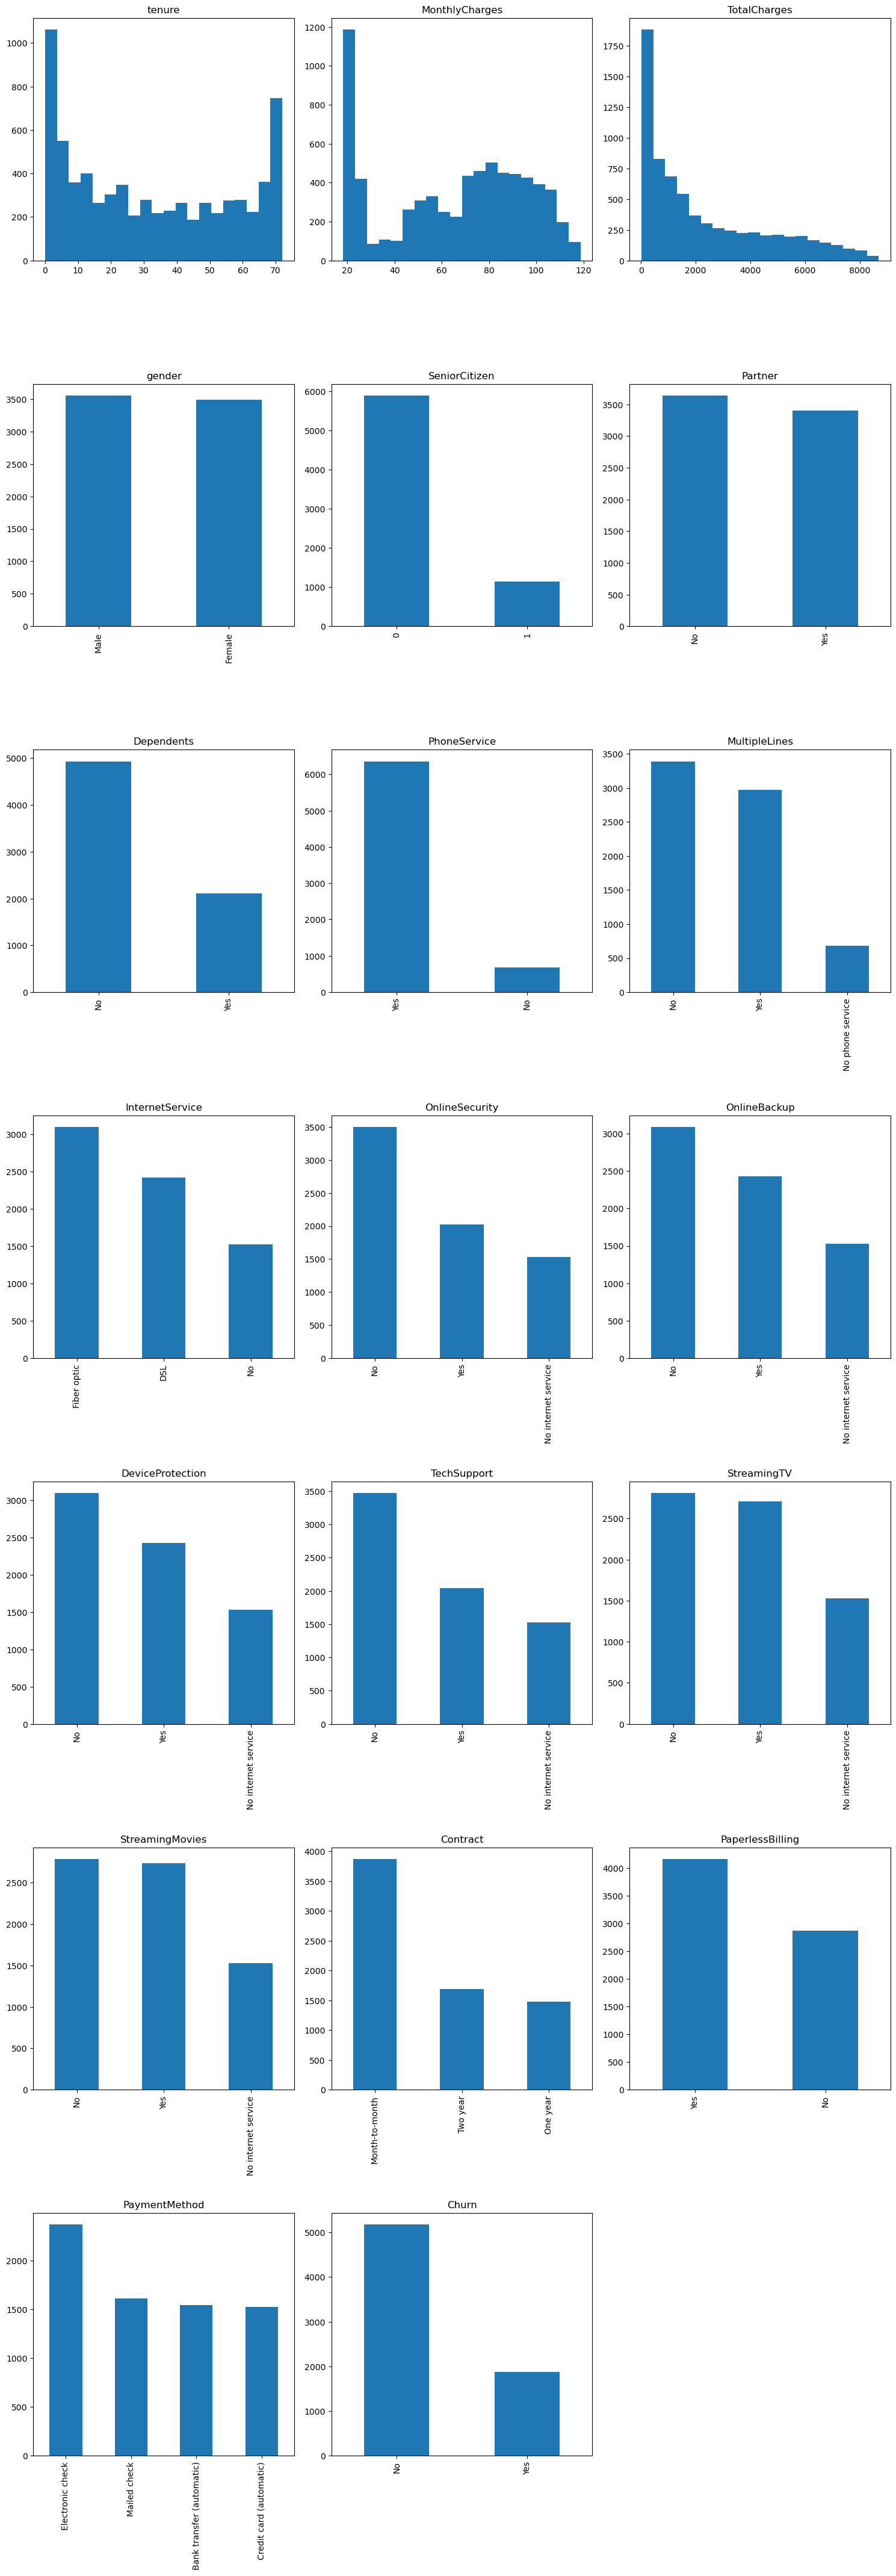

In [148]:
# calculate the recommended number of histogram columns
histogram_col_nb = int(1 + 3.22 * np.log(dataset.shape[0]))

# determine the number of rows needed for the plot
num_histogram_rows = len(dataset.select_dtypes(include=['float64', 'int64']).columns) + \
                     len(dataset.select_dtypes(include=['object']).columns)

# set the height of each subplot
fig, axs = plt.subplots(num_histogram_rows, 3, figsize=(15, 120))

# flatten the array of subplots so that we can easily loop through them
axs = axs.flatten()

# loop through each continuous column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns):
    # plot the histogram for the column
    axs[i].hist(dataset[column].dropna(), bins=20)
    axs[i].set_title(column)
   
# loop through each categorical column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['object']).columns):
    # plot the histogram for the column
    dataset[column].value_counts().plot(kind='bar', ax=axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)])
    axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)].set_title(column)
    
# remove unused subplots
for i in range(len(dataset.columns), len(axs)):
    fig.delaxes(axs[i])

# show the plot
plt.tight_layout()
plt.show()

### Descriptions of histograms

| Attribute | Type | Description of the distribution |
| --------- | ---- | ----------- |
| gender | Category | Two categories, evenly distributed |
| SeniorCitizen | Category | Two categories, there are less seniors than non-senior |
| Partner | Category | Two categories, evenly distributed |
| Dependents| Category | Two categories, there are more dependants |
| tenure | Number (int) | Parabolic distribution |
| PhoneService | Category | Two categories, unevenly distributed, there are more people having a Phone Service |
| MultipleLines | Category | Three categories, evenly distributed for people having a phone service |
| InternetService | Category | Three categories, unevenly distributed, it looks like a linear distribution  |
| OnlineSecurity | Category | Three categories, unevenly distributed, for those having internet, more have no online security |
| OnlineBackup | Category | Three categories, unevenly distributed, for those having internet, more have no online backup but the difference is not important |
| DeviceProtection | Category | Three categories, unevenly distributed, for those having internet, more have no device protection but the difference is small |
| TechSupport | Category | Three categories, unevenly distributed, for those having internet, more have no technical support |
| StreamingTV | Category | Three categories, evenly distributed for those having internet |
| StreamingMovies | Category | Three categories, evenly distributed for those having internet |
| Contract | Category | Three categories, unevenly distributed, half people have month-to-month contract, the other is evenly distributed between one and two year contract  |
| PaperlessBilling | Category | Two categories, unevenly distributed, more people have paperless billing |
| PaymentMethod | Category | Four categories, more people have electronic check payment, for the three other categories it is evenly distributed |
| MonthlyCharges | Number (float) | Normal distribution with a peak on the very left |
| TotalCharges | Number (float) | Positivily skewed |
| Churn | Category | Two categories, unevenly distributed, there are less churn |

## 5. Identify data quality problems: missing values, cardinality problems, outliers. Provide a plan for resolving these issues, which will be implemented programmatically (e.g. missing categorical attribute values will be included based on an attribute‘s mode estimate, extreme values are eliminated or adjusted).

- Problem with TotalCharges, it has 10 missing values

For missing values, I will just remove the rows with missing values.

There are no outliers.

In [149]:
dataset.loc[dataset['TotalCharges'].isnull(),['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines','InternetService','MonthlyCharges','Contract', 'PaymentMethod', 'TotalCharges', 'Churn']]

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,Contract,PaymentMethod,TotalCharges,Churn
488,Female,0,0,No,No phone service,DSL,52.55,Two year,Bank transfer (automatic),NaN,No
753,Male,0,0,Yes,No,No,20.25,Two year,Mailed check,NaN,No
936,Female,0,0,Yes,No,DSL,80.85,Two year,Mailed check,NaN,No
1082,Male,0,0,Yes,Yes,No,25.75,Two year,Mailed check,NaN,No
1340,Female,0,0,No,No phone service,DSL,56.05,Two year,Credit card (automatic),NaN,No
3331,Male,0,0,Yes,No,No,19.85,Two year,Mailed check,NaN,No
3826,Male,0,0,Yes,Yes,No,25.35,Two year,Mailed check,NaN,No
4380,Female,0,0,Yes,No,No,20.00,Two year,Mailed check,NaN,No
5218,Male,0,0,Yes,No,No,19.70,One year,Mailed check,NaN,No
6670,Female,0,0,Yes,Yes,DSL,73.35,Two year,Mailed check,NaN,No


In [150]:
dataset.loc[dataset['TotalCharges'].isnull(),'TotalCharges'] = dataset.loc[dataset['TotalCharges'].isnull(),'MonthlyCharges']


In [151]:
dataset.loc[[488,753,936,1082]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No


## 6. Investigate relationships between attributes using visualization techniques:

**For continuous type attributes:**
- Using a scatter plot type graph, provide several (2-3) examples with strong linear attribute dependency (direct or inverse correlation) and several examples with non-correlated (weakly correlated) attributes. Comment the results.
- Provide SPLOM diagram (Scatter Plot Matrix).



### Scatter plot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

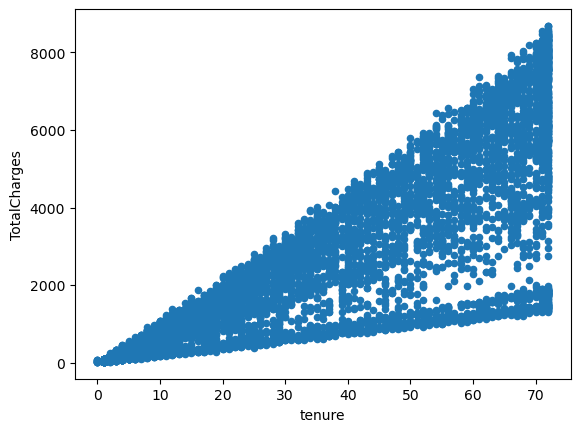

In [154]:
dataset.plot.scatter('tenure', 'TotalCharges')

Linear correlation

The older the customer has initiated his contract the more he has spent money in the company.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

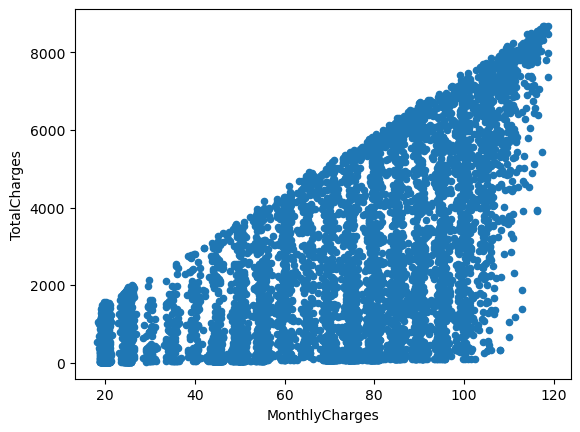

In [155]:
dataset.plot.scatter('MonthlyCharges', 'TotalCharges')

Small linear correlation

The more the customer has higher monthly charges, the more he has spent money in the company.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

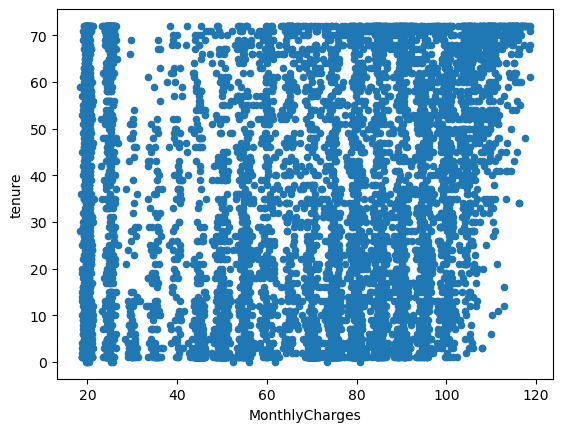

In [156]:
dataset.plot.scatter('MonthlyCharges', 'tenure')

No correlation between the tenure and monthly charges.

### SPLOM diagram

array([[<AxesSubplot:xlabel='tenure', ylabel='tenure'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>],
       [<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='TotalCharges'>]],
      dtype=object)

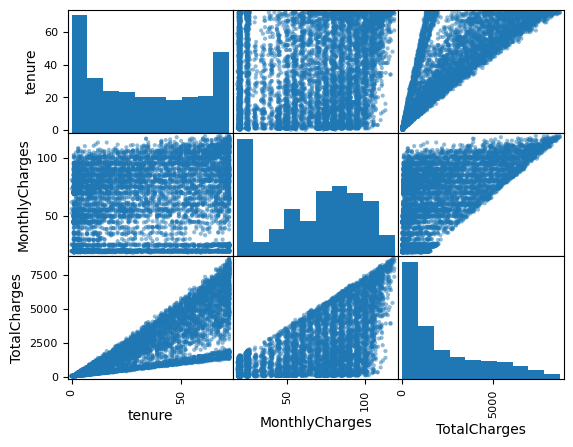

In [157]:
# Plot splom diagram
pd.plotting.scatter_matrix(dataset.drop('SeniorCitizen', axis=1))

**For categorical attributes:**
- Using the bar plot type diagram, give some (2-3) examples of attribute dependency and comment the results.
- Provide some (2-3) examples of histograms and box plot diagrams depicting relationships between categorical and continuous type variables.


In [158]:
display_all_categorical_relationship = False
if display_all_categorical_relationship:
    for column in dataset.select_dtypes(include=['object']).columns:
        for column2 in dataset.select_dtypes(include=['object']).columns:
            if column != column2:
                pd.crosstab(index=dataset[column], columns=dataset[column2], normalize='index').plot.bar()
    
# pd.crosstab(index=dataset['SeniorCitizen'],columns=dataset['MultipleLines'],normalize='index').plot.bar()
# pd.crosstab(index=dataset['SeniorCitizen'],columns=dataset['PaymentMethod'],normalize='index').plot.bar()
# pd.crosstab(index=dataset['Churn'],columns=dataset['Churn'],normalize='index').plot.bar()

**Let's get some interesting examples:**

<AxesSubplot:title={'center':'PhoneService'}>

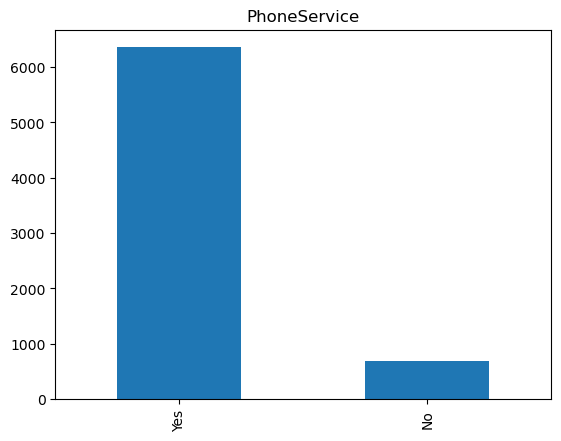

In [159]:
dataset['PhoneService'].value_counts().plot(kind='bar', title='PhoneService')


Most customers has contracted a Phone Service.

<AxesSubplot:title={'center':'Churn'}>

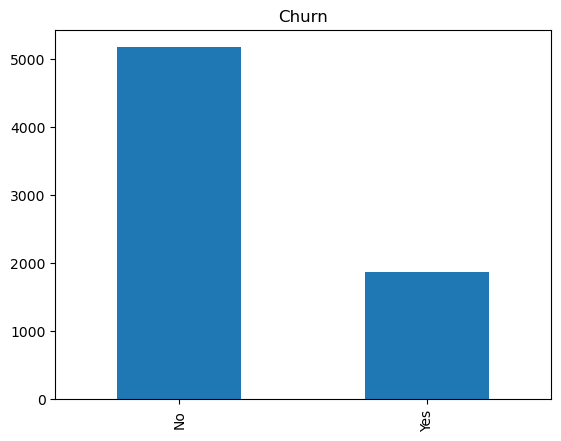

In [160]:
dataset['Churn'].value_counts().plot(kind='bar', title='Churn')


Most customers has not churned. It is the target column. We will have to balance this in a way or another.

<AxesSubplot:title={'center':'Contract'}>

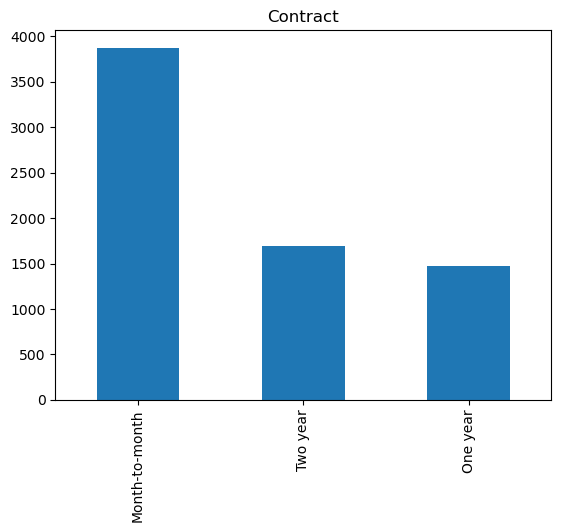

In [161]:
dataset['Contract'].value_counts().plot(kind='bar', title='Contract')


Most of customers pay month-to-month. The others pays either one or two year.

<AxesSubplot:xlabel='Partner'>

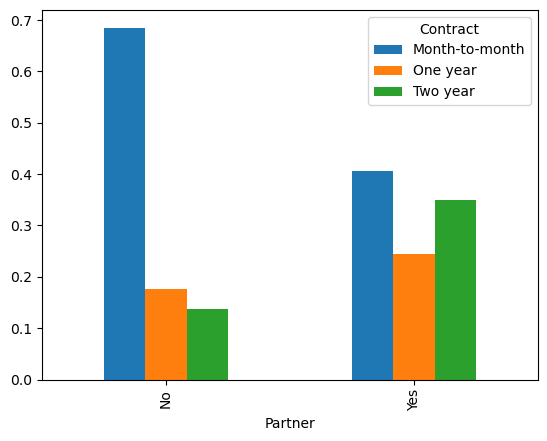

In [162]:
pd.crosstab(index=dataset['Partner'], columns=dataset['Contract'], normalize='index').plot.bar()


Customers without partner mostly has a month-to-month contract whereas customers with a partner evenly have different contract.

<AxesSubplot:xlabel='MultipleLines'>

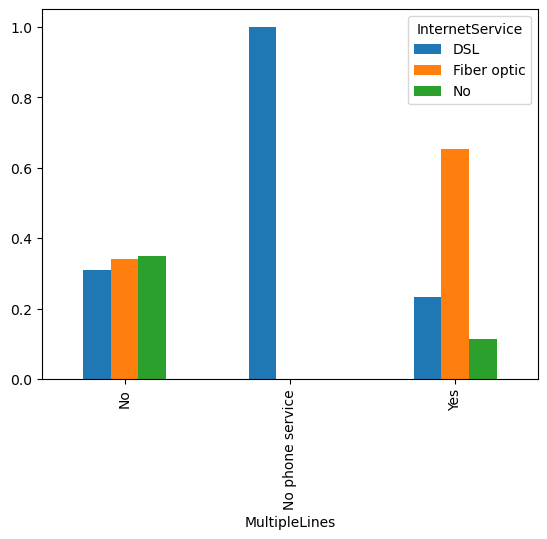

In [163]:
pd.crosstab(index=dataset['MultipleLines'], columns=dataset['InternetService'], normalize='index').plot.bar()


In [164]:
print(dataset.loc[(dataset['MultipleLines']=='No phone service') & (dataset['InternetService'] == 'DSL')].count)

<bound method DataFrame.count of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female             0     Yes         No       1           No   
3       Male             0      No         No      45           No   
7     Female             0      No         No      10           No   
20      Male             1      No         No       1           No   
27      Male             0     Yes        Yes       1           No   
...      ...           ...     ...        ...     ...          ...   
7003    Male             0      No         No      26           No   
7007    Male             1     Yes         No      72           No   
7029  Female             1      No         No       6           No   
7036  Female             0      No         No      12           No   
7040  Female             0     Yes        Yes      11           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No   

Customers with MultipleLines tends to have Fiber optic as Internet Service.

**Examples relationship**

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='SeniorCitizen'>

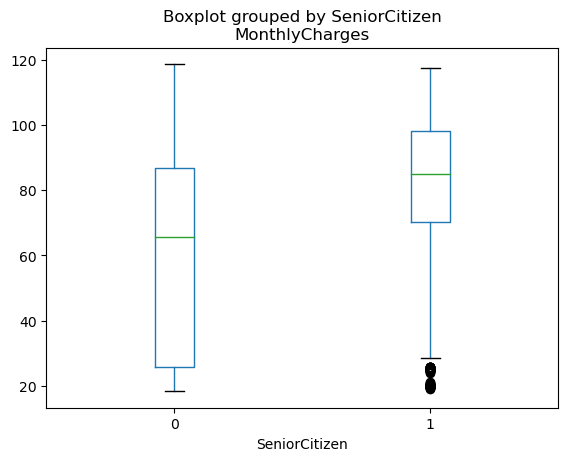

In [165]:
dataset.boxplot(by ='SeniorCitizen', column =['MonthlyCharges'], grid = False)

Senior customers have on average higher monthly charges. The standard deviation is smaller on SeniorCitizen.
Outliers

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Contract'>

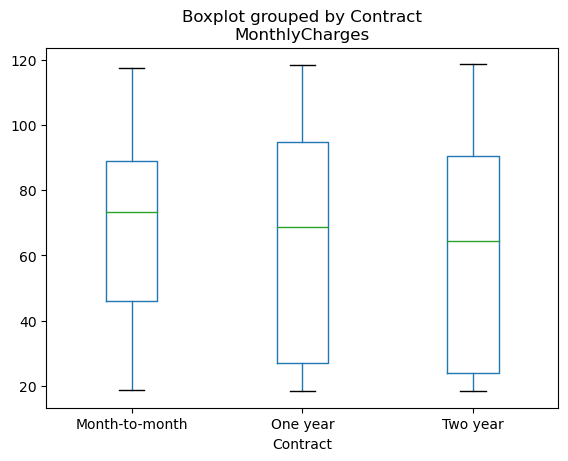

In [166]:
dataset.boxplot(by ='Contract', column =['MonthlyCharges'], grid = False)

Customers who have a longer duration contract spend on average less money for monthly charges.

<AxesSubplot:title={'center':'tenure'}, xlabel='TechSupport'>

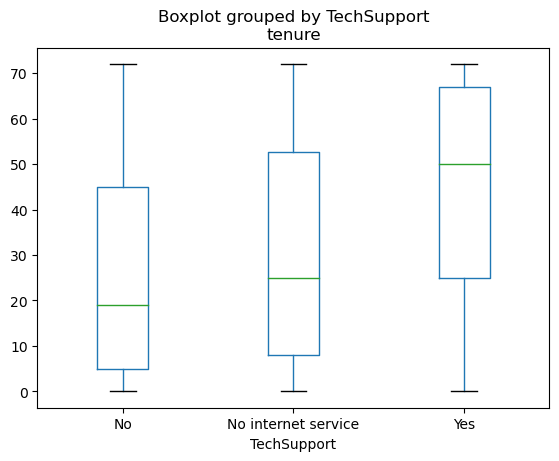

In [167]:
dataset.boxplot(by ='TechSupport', column =['tenure'], grid = False)

Customers with technical support have in average initiated their contract for longer than customers without technical support.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

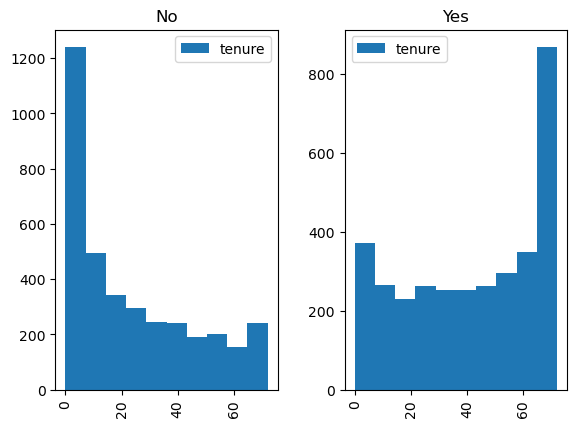

In [168]:
dataset.hist(by ='Partner', column =['tenure'], grid = False, legend=True)


Customer tends to stay longer if they have a partner.

array([[<AxesSubplot:title={'center':'Bank transfer (automatic)'}>,
        <AxesSubplot:title={'center':'Credit card (automatic)'}>],
       [<AxesSubplot:title={'center':'Electronic check'}>,
        <AxesSubplot:title={'center':'Mailed check'}>]], dtype=object)

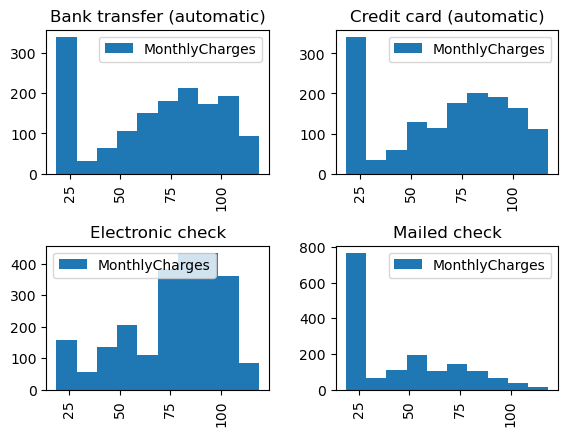

In [169]:
dataset.hist(by ='PaymentMethod', column =['MonthlyCharges'], grid = False, legend=True)

Only customers who pay by electronic check do not mostly have low monthly charges.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

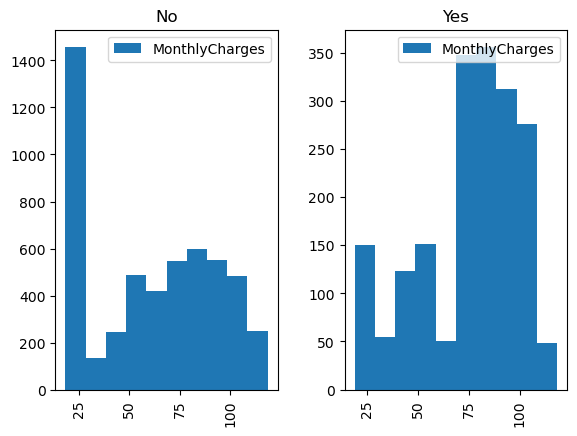

In [170]:
dataset.hist(by ='Churn', column =['MonthlyCharges'], grid = False, legend=True)

Customers who have churned are mostly the ones that are having high monthly charges.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

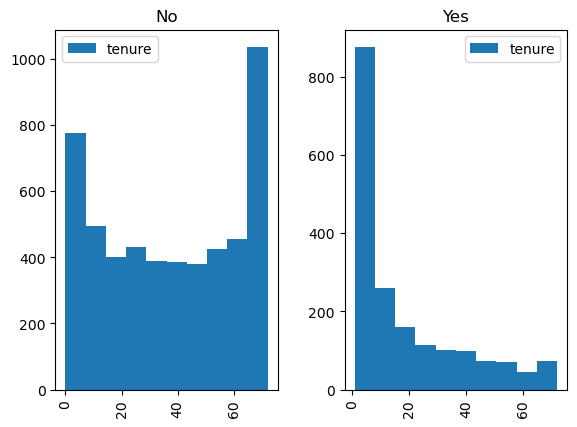

In [171]:
dataset.hist(by ='Churn', column =['tenure'], grid = False, legend=True)

Customers who have churned are mostly new customers. The older the customer is the least he churns.

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'No phone service'}>],
       [<AxesSubplot:title={'center':'Yes'}>, <AxesSubplot:>]],
      dtype=object)

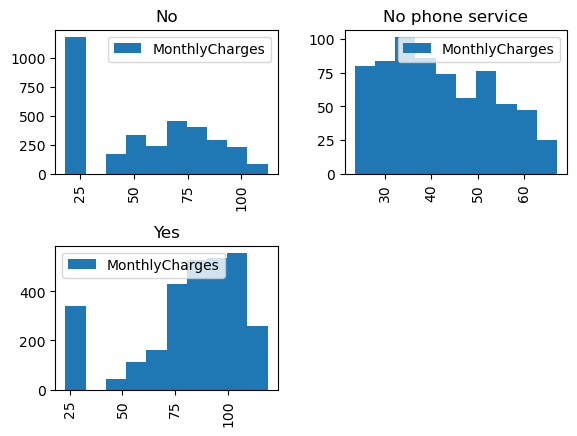

In [172]:
dataset.hist(by ='MultipleLines', column =['MonthlyCharges'], grid = False, legend=True)

## 7. Calculate the covariance and correlation values between continuous attributes and graphically represent the correlation matrix. Comment the results.

**Covariance:**

In [173]:
dataset.cov(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,603.168108,183.196987,4.599233e+04
MonthlyCharges,183.196987,905.410934,4.441453e+04
TotalCharges,45992.327611,44414.529914,5.138066e+06


**Correlation:**

In [174]:
dataset.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826164
MonthlyCharges,0.247900,1.000000,0.651182
TotalCharges,0.826164,0.651182,1.000000


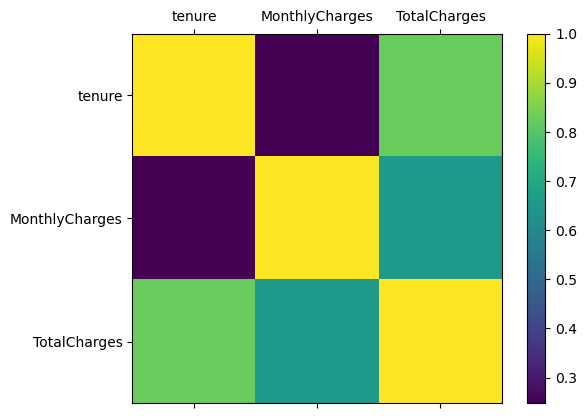

In [175]:
alpha = dataset.corr(numeric_only=True).columns


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(numeric_only=True))
fig.colorbar(cax)

xaxis = np.arange(len(alpha))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)

plt.show()

Tenure and TotalCharges are highly correlated, the longest the customer has initiated his contract the most he has paid.

Monthly Charges and Total Charges are correlated.

Monthly Charges and tenure are poorly correlated.

## 8. Perform data normalization (boundaries [0; 1] or [-1; 1]).

See [MinMaxScaler (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [176]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

dataset[columns_to_scale].sample(5) # Quick view on data

,tenure,MonthlyCharges,TotalCharges
6136,0.638889,0.019900,0.100571
5238,0.458333,0.353234,0.212151
6276,0.208333,0.020896,0.036597
2007,0.027778,0.616418,0.018728
4695,0.486111,0.024876,0.078658


## 9. Convert categorical variables to continuous type variables.

#### Convert Yes and No to 1 and 0

In [177]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dataset[col].replace({'No phone service':2, 'No internet service':2, 'Yes': 1,'No': 0},inplace=True)

In [178]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [2 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 

#### Convert genre

In [179]:
dataset['gender'].replace({'Female':1,'Male':0},inplace=True)
dataset['gender'].unique()

array([1, 0])

**Convert SeniorCitizen**

In [180]:
dataset['SeniorCitizen'].replace({'1':1,'0':0},inplace=True)


#### Convert other categorical columns



In [183]:
categorical_columns=['InternetService','Contract','PaymentMethod']
dataset['InternetService'].replace({'DSL':2,'Fiber optic':1,'No':0},inplace=True)
dataset['Contract'].replace({'Month-to-month':2,'One year':1,'Two year':0},inplace=True)
dataset['PaymentMethod'].replace({'Electronic check':3, 'Mailed check':2,'Bank transfer (automatic)':1,'Credit card (automatic)':0},inplace=True)


# Print all columns including new ones
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
# Display types of columns (check new columns)
dataset.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [185]:
dataset.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2408,1,0,1,1,0.625000,1,0,0,2,2,2,2,2,2,0,0,2,0.025871,0.100779,0
2846,1,0,1,0,0.027778,1,0,2,1,0,0,0,0,1,2,1,2,0.436816,0.010882,0
3964,1,0,1,1,0.944444,1,1,1,1,0,1,1,1,1,0,0,0,0.930348,0.864586,0
1902,0,0,1,1,1.000000,1,1,2,1,1,1,1,1,1,0,1,0,0.719900,0.741178,0
2927,0,0,0,0,0.013889,1,0,1,0,0,0,0,0,0,2,1,3,0.513930,0.005897,0


# Before training a model

- Normalize columns which have not been normalized yet